# Keras

### A high-level neural networks API, writen in Python and capable of running on top of Tensorflow, Microsoft Cognitive Toolkit (CNTK), or Theano.

## Handwritten digit recognition
* Images of digits (0-9), i.e. 10 classes to predict
* Each image is a 28 by 28 pixel square (784 pixels total)

In [1]:
import time
global_start = time.time()
# Define GPUs to be used
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Fix random seed for reproducibility
import numpy as np
seed = 7
np.random.seed(seed)

# Loading data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Exploring the data
print ("Number of train elements/images:", len(X_train))
print ("Number of test  elements/images:", len(X_test))

print ("Element shape", X_train[0].shape)
# print "First element:\n", X_train[0]
# print "First element class", y_train[0]

# Reducing dataset elements to be run on CPU
X_train = X_train[:6000]
y_train = y_train[:6000]
X_test = X_test[:1000]
y_test = y_test[:1000]


Using TensorFlow backend.


Number of train elements/images: 60000
Number of test  elements/images: 10000
Element shape (28, 28)


In [2]:
# Plotting some items in gray scale 
import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

<Figure size 640x480 with 4 Axes>

In [3]:
# Preprocessing data

# Flattening 28*28 images to 784 vector for each image
print ("X_train shape (before): ", X_train.shape)

num_pixels = X_train.shape[1]*X_train.shape[2]

X_train_flat = X_train.reshape(X_train.shape[0], num_pixels)
X_test_flat = X_test.reshape(X_test.shape[0], num_pixels)

print ("X_train shape (after): ", X_train_flat.shape)

# Normalizing inputs from 0-255 to 0-1
X_train_flat = X_train_flat/255.0
X_test_flat = X_test_flat/255.0

X_train shape (before):  (6000, 28, 28)
X_train shape (after):  (6000, 784)


In [4]:
# One hot encoding the target vector
from keras.utils import np_utils
print (y_test.shape)
y_train_cat = np_utils.to_categorical(y_train)
y_test_cat = np_utils.to_categorical(y_test)
num_classes = y_test_cat.shape[1]
print (num_classes)
print (y_test_cat.shape)

(1000,)
10
(1000, 10)


## Multi-Layer Perceptron

In [5]:
# Generate the model 
from keras.models import Sequential
from keras.layers import Dense


# Create a sequential model
model = Sequential()
# Add feed-forward layer
model.add(Dense(units=200, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
# Add softmax layer
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

In [6]:
# View model architecture
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


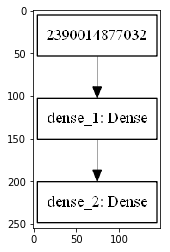

In [7]:
# Plotting the model
from keras.utils import plot_model

def plot_show_model(model):
    plot_model(model, to_file='FF.png', show_shapes=False, show_layer_names=True, rankdir='TB')
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    img=mpimg.imread('FF.png')
    imgplot = plt.imshow(img)
    plt.show()
    
plot_show_model(model)

In [8]:
# Model compilation
# Parameters:
#    loss='categorical_crossentropy'
#    optimizer='adam'
#    metrics=['accuracy']   
#    List of metrics evaluated during training and testing
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Model training
model.fit(X_train_flat, y_train_cat, validation_data=(X_test_flat, y_test_cat), epochs=10, batch_size=128, verbose=1)

Train on 6000 samples, validate on 1000 samples
Epoch 1/10
6000/6000 [==============================] - 2s 314us/step - loss: 1.0987 - acc: 0.7417 - val_loss: 0.5863 - val_acc: 0.8500
Epoch 2/10
6000/6000 [==============================] - 1s 197us/step - loss: 0.3940 - acc: 0.8983 - val_loss: 0.4213 - val_acc: 0.8840
Epoch 3/10
6000/6000 [==============================] - 1s 169us/step - loss: 0.2961 - acc: 0.9220 - val_loss: 0.3508 - val_acc: 0.8940
Epoch 4/10
6000/6000 [==============================] - 1s 136us/step - loss: 0.2453 - acc: 0.9328 - val_loss: 0.3203 - val_acc: 0.9040
Epoch 5/10
6000/6000 [==============================] - 1s 101us/step - loss: 0.2061 - acc: 0.9458 - val_loss: 0.2912 - val_acc: 0.9100
Epoch 6/10
6000/6000 [==============================] - 1s 87us/step - loss: 0.1764 - acc: 0.9527 - val_loss: 0.2809 - val_acc: 0.9090
Epoch 7/10
6000/6000 [==============================] - 1s 84us/step - loss: 0.1563 - acc: 0.9585 - val_loss: 0.2647 - val_acc: 0.9180
Ep

In [10]:
score = model.evaluate(X_test_flat, y_test_cat, verbose=0)
print ("Accuracy: ", score[1]*100, "%")

# Probability distribution over the classes shape:(elements, classes)
prediction = model.predict(X_test_flat)

print ("Prediction shape:",  prediction.shape)

print (prediction[0])



Accuracy:  92.3 %
Prediction shape: (1000, 10)
[  9.34328000e-06   1.91899886e-07   8.21068243e-05   2.40677712e-03
   4.73880633e-08   5.57326712e-06   1.27425492e-09   9.97374535e-01
   7.53264521e-06   1.13951319e-04]


In [11]:
# Getting the right prediction
predicted_classes = model.predict(X_test_flat).argmax(axis=1)
print ("Prediction shape:",  predicted_classes.shape)
print (predicted_classes[0])

Prediction shape: (1000,)
7


## A Simple Convolutional Neural Network

In [12]:
# Generate the model 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Loading data
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reducing dataset elements to be run on CPU
X_train = X_train[:6000]
y_train = y_train[:6000]
X_test = X_test[:1000]
y_test = y_test[:1000]


# Preprocess data

X_train_4D = np.expand_dims(X_train, axis=-1)/255.0
X_test_4D = np.expand_dims(X_test, axis=-1)/255.0
print (X_train_4D.shape, X_test_4D.shape)

# Creating the model
model = Sequential()
model.add(Conv2D(filters=100, kernel_size=(10, 10), 
                 input_shape=X_train_4D.shape[1:], 
                 activation='relu'))

#model.add(Conv2D(10, (8, 8), activation='relu'))
model.add(MaxPooling2D(pool_size=(9,9)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

np.random.seed(500)

history = model.fit(X_train_4D, y_train_cat, validation_split=0.20, batch_size=32, epochs=5, verbose=1)

score = model.evaluate(X_test_4D, y_test_cat, verbose=0)

print ("Accuracy on test set: ", score[1]*100, "%")


(6000, 28, 28, 1) (1000, 28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 19, 100)       10100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 14,110
Trainable params: 14,110
Non-trainable params: 0
_________________________________________________________________
Train on 4800 samples, validate on 1200 samples
Epoch 1/5
4800/4800 [==============================] - 7s 1ms/step - loss: 1.0329 - acc: 0.7748 - val_loss: 0.3925 - val_acc: 0.9192
Epoch 2/5
4800/4800 [==============================] 

### Training History Visualization

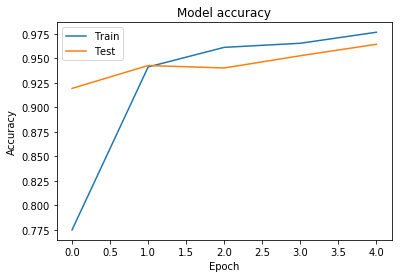

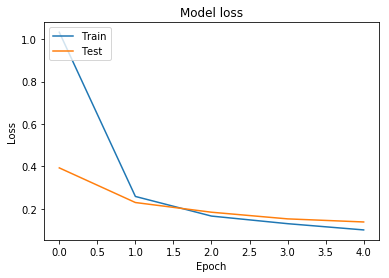

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## Sentiment Analysis

* Sentiment analysis aims to determine the attitude of a speaker or a writer with respect to some topic or the overall contextual polarity of a document.

* Most common classes: positive, negative, and neutral.



### Dataset: IMDB Movie reviews sentiment classification

* Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). 
* Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). 
* Words are indexed by overall frequency in the dataset

[Source: https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification]

In [14]:
from keras.datasets import imdb

# Loading the IMBD dataset
# Selecting the 2000 most frequent words
(x_train_org, y_train), (x_test_org, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=2000,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=2)

print(x_train_org.shape, x_test_org.shape)

print (x_train_org[0][:10])
print (x_test_org[0][:10])

# Reducing the data size to be run on CPUs
x_train_org = x_train_org[:5000]
y_train = y_train[:5000]
x_test_org = x_test_org[:500]
y_test= y_test[:500]

(25000,) (25000,)
[1, 13, 21, 15, 42, 529, 972, 1621, 1384, 64]
[1, 590, 201, 13, 30, 5, 716, 9, 9, 2]


In [15]:
# Loading the vocabulary
import numpy as np

vocab = imdb.get_word_index(path="./imdb_word_index.json")
print ("Number of unique words:", len(vocab))

INDEX_FROM = 2 

# Dict {word:id}
word_to_id = {x:vocab[x]+INDEX_FROM for x in vocab if vocab[x]<=2000}
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2


# Dict {id:word}
id_to_word = {word_to_id[x]:x for x in word_to_id}

# Array of ordered words by their frequency + special characters
vocab_list = np.array(["<PAD>"]+[id_to_word[x] for x in range(1,2001)])


Number of unique words: 88584


In [16]:
# Summarize number of classes
print ("Classes:", np.unique(y_train), "\n")
# y = {0:negative | 1:positive}

i = 500
print ("Review:", " ".join(vocab_list[np.array(x_train_org[i])]))
print ("Class: ", "positive" if y_train[i] == 1 else "negative")

Classes: [0 1] 

Review: <START> and that's why hard to rate br br from the adult point of view <UNK> student point of view i must say i fell nearly <UNK> here sure there is some laughing scene all the credit takes here eddie but that can't save the disney type of script and whole movie that's why br br 2 out of 10
Class:  negative


In [17]:
def get_W(word_vecs, k=300):
    """
    Get word matrix. W[i] is the vector for word indexed by i
    """
    vocab_size = len(word_vecs)
    word_idx_map = dict()
    W = np.zeros(shape=(vocab_size + 1, k), dtype='float32')
    W[0] = np.zeros(k, dtype='float32')
    i = 1
    for word in word_vecs:
        W[i] = word_vecs[word]
        word_idx_map[word] = i
        i += 1
    return W, word_idx_map


def load_bin_vec(fname, vocab):
    """
    Loads 300x1 word vecs from Google (Mikolov) word2vec
    """
    word_vecs = {}
    with open(fname, "rb") as f:
        header = f.readline()
        # ~ print header
        vocab_size, layer1_size = map(int, header.split())
        binary_len = np.dtype('float32').itemsize * layer1_size
        # print(vocab_size)
        for line in range(vocab_size):
            # print(line)
            word = []
            while True:
                ch = f.read(1)
                if ch == ' ':
                    word = ''.join(word)
                    break
                if ch != '\n':
                    word.append(ch)
            # print(word)
            if word in vocab:
                # print(word)
                word_vecs[word] = np.frombuffer(f.read(binary_len), dtype='float32')
            else:
                f.read(binary_len)

    return word_vecs

def add_unknown_words(word_vecs, vocab, min_df=1, k=300):
    """
    For words that occur in at least min_df documents, create a separate word vector.    
    0.25 is chosen so the unknown vectors have (approximately) same variance as pre-trained ones
    """
    for word in vocab:
        if word not in word_vecs and vocab[word] >= min_df:
            word_vecs[word] = np.random.uniform(-0.25, 0.25, k)
            

In [18]:
import time
start = time.time()
#w2v_file = "/projekte/slu/share/GoogleNews-vectors-negative300.bin"
w2v_file = "GoogleNews-vectors-negative300.bin"
w2v = load_bin_vec(w2v_file, word_to_id)
print("num words found:"+ str(len(w2v)))
add_unknown_words(w2v, word_to_id, k=300)
W, word_idx_map = get_W(w2v, k=300)

print ("W shape: ", W.shape)

print (time.time()-start, "seconds to get the embeddings")

MemoryError: 

In [ ]:
# Max and avg number of word
lengths = [len(x) for x in x_train_org]
print "max", max(lengths)
print "mean", np.mean(lengths)


In [ ]:
# Padding the input data
from keras.preprocessing import sequence
input_length = 350 # average length 

x_train = sequence.pad_sequences(x_train_org, maxlen=input_length, padding='post', truncating='post')
x_test = sequence.pad_sequences(x_test_org, maxlen=input_length, padding='post', truncating='post')
print(x_train[1])


### Two dense layers for Sentiment Analysis

In [ ]:
# create the model - Two dense layer
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

model = Sequential()
model.add(Embedding(W.shape[0], W.shape[1], input_length=input_length, weights=[W]))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
plot_model(model, to_file='Sent_FF.png', show_shapes=False, show_layer_names=True, rankdir='TB')

# loss function = binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

### Simple CNN for Sentiment Analysis

In [ ]:
# create the model - CNN
from keras.layers import Conv2D, Reshape, MaxPooling2D

vocab_size = W.shape[0]
embedding_size = W.shape[1]

model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=input_length, weights=[W]))
model.add(Reshape((input_length, embedding_size, 1)))

# CNN hyperparameters
num_filters = 100
n_gram = 5
filter_size = (n_gram, embedding_size)
          
model.add(Conv2D(num_filters, filter_size, activation='relu'))
print model.output_shape
model.add(MaxPooling2D(pool_size=(model.output_shape[1], 1)))
          
model.add(Flatten())
model.add(Dense(250, activation='relu'))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
plot_model(model, to_file='Sent_simple_CNN.png', show_shapes=False, show_layer_names=True, rankdir='TB')

In [ ]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

###  Non-sequential CNN for Sentiment Analysis

In [ ]:
from keras.models import Model
from keras.layers import Input, Concatenate

# Input layer
input_x = Input(shape=(input_length,), dtype=np.int32)

# Embedding layer
embeddings = Embedding(vocab_size, embedding_size, input_length=input_length,
                           weights=[W])(input_x)

# Reshape to 3D
conv_input = Reshape((input_length, embedding_size, 1))(embeddings)

# CNN Hyperparameters
# 3 filters shapes
filter_widths = [3, 4, 5]

num_filters = 100
filter_height = embedding_size

pooled_outputs = []

# Convolution layers
for width in filter_widths:
    conv = Conv2D(num_filters, (width, filter_height), activation='relu')(conv_input)
    pooling = MaxPooling2D(pool_size=(int(conv.shape[1]), 1))(conv)
    pooled_outputs.append(pooling)
    
# Concatenation of maxpooling outputs
h_pool = Concatenate(axis=-1)(pooled_outputs)
h_pool = Reshape((int(h_pool.shape[-1]), ))(h_pool)

# Sigmoid
dense = Dense(1, activation='sigmoid')(h_pool)

model = Model(input_x, dense)


# Model compilation, Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()    
plot_model(model, to_file='Sent_non_seq_CNN.png', show_shapes=False, show_layer_names=True, rankdir='TB')

In [ ]:
# Fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512, verbose=2)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test,  batch_size=512, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

###  LSTM-RNN for Sentiment Analysis

In [ ]:
from keras.models import Model
from keras.layers import LSTM, Input

# Input layer
input_x = Input(shape=(input_length,), dtype=np.int32)

# Embedding layer
embeddings = Embedding(2002, 32, input_length=input_length, 
                       mask_zero=True)(input_x)

# Reshape to 3D
lstm = LSTM(units=100)(embeddings)


# Sigmoid
dense = Dense(1, activation='sigmoid')(lstm)

# Defining model
model = Model(input_x, dense)


# Model compilation, Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()    
# plot_model(model, to_file='Sent_lstm.png', show_shapes=False, show_layer_names=True, rankdir='TB')

In [ ]:
# Fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=512)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, batch_size=512, verbose=0)
print "Accuracy: %.2f%%" % (scores[1]*100)

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Saving and loading the model



In [ ]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

scores = model.evaluate(x_test, y_test, batch_size=512, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))